# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

The data represents 17 marketing campaigns from a Protugese banking institution

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from time import time
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [4]:
#Analyzed the data in the columns
value_counts = df['default'].value_counts()
print(value_counts)

no         32588
unknown     8597
yes            3
Name: default, dtype: int64


In [5]:
#Analyzed the data in the columns
value_counts = df['job'].value_counts()
print(value_counts)

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64


In [6]:
#Analyzed the data in the columns
value_counts = df['marital'].value_counts()
print(value_counts)

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64


In [7]:
#Analyzed the data in the columns
value_counts = df['education'].value_counts()
print(value_counts)

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64


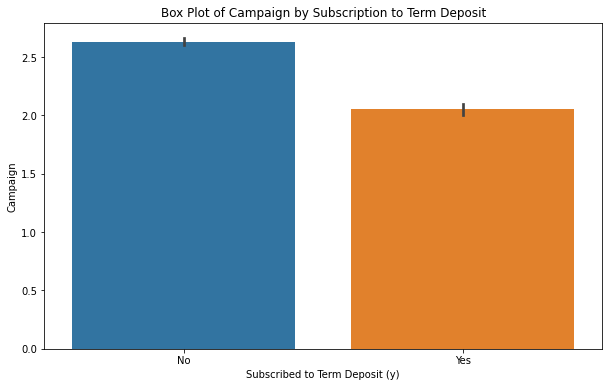

In [8]:
# Box plot for continuous variable 'age' by target variable
plt.figure(figsize=(10, 6))
sns.barplot(x='y', y='campaign', data=df)
plt.title('Box Plot of Campaign by Subscription to Term Deposit')
plt.xlabel('Subscribed to Term Deposit (y)')
plt.ylabel('Campaign')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

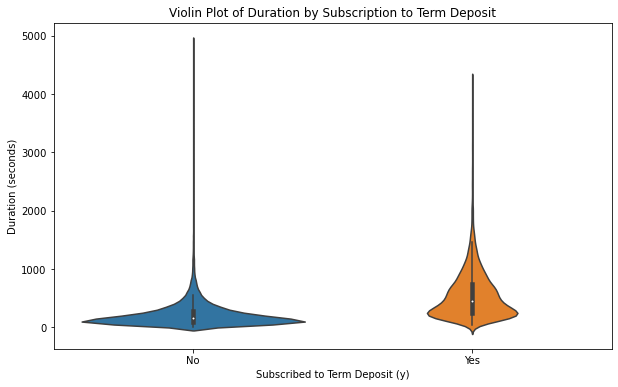

In [9]:
# Violin plot for continuous variable 'duration' by target variable
plt.figure(figsize=(10, 6))
sns.violinplot(x='y', y='duration', data=df)
plt.title('Violin Plot of Duration by Subscription to Term Deposit')
plt.xlabel('Subscribed to Term Deposit (y)')
plt.ylabel('Duration (seconds)')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

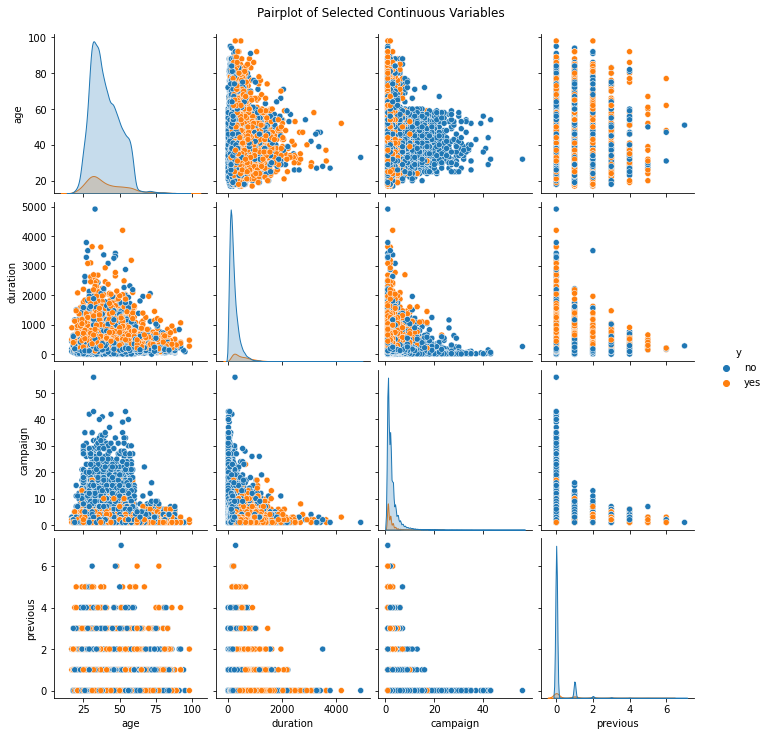

In [10]:
# Pairplot for selected continuous variables
selected_continuous_vars = ['age', 'duration', 'campaign', 'previous']
sns.pairplot(df[selected_continuous_vars + ['y']], hue='y')
plt.suptitle('Pairplot of Selected Continuous Variables', y=1.02)
plt.show()

Understood the data by examining the data description and variables. Also, found that the dataset doesn't contain any missing values. But there are categorical variables which will need encoding.

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

<!-- Business Objective : To predict whether a bank client will subscribe to a term deposit based on the provided variables -->

Business Objective : To predict whether a bank client will subscribe to a term deposit based on the provided variables

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [12]:
# Select the relevant features
features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan','contact','month','day_of_week','duration','campaign','pdays','previous','poutcome','emp.var.rate','cons.price.idx','euribor3m','nr.employed']
target = 'y'

In [13]:
# Encode categorical features
le = LabelEncoder()
for col in features:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

In [14]:
X = df[features]
y = df[target]

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [15]:
#Splitting the train and test datsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
print(y_train)

12556     no
35451     no
30592     no
17914     no
3315      no
        ... 
6265      no
11284     no
38158    yes
860       no
15795     no
Name: y, Length: 32950, dtype: object


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

As a baseline model, we can calculate the proportion of 'yes' and 'no' in the target variable and predict the majority class for all instances.

In [17]:
value_counts = y_train.value_counts()
print(value_counts)

no     29245
yes     3705
Name: y, dtype: int64


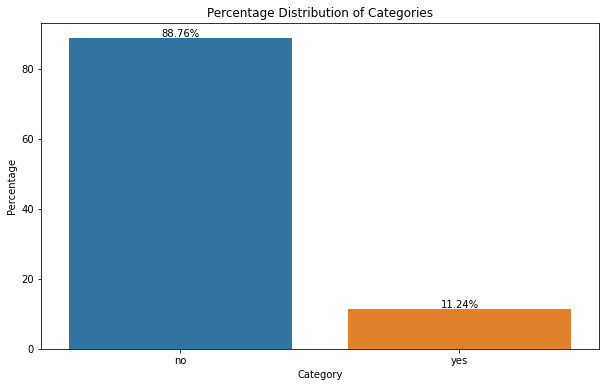

In [18]:
# Calculate percentages
percentages = y_train.value_counts(normalize=True) * 100

# Create a DataFrame for better plotting
df = percentages.reset_index()
df.columns = ['Category', 'Percentage']

# Plot the bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Percentage', data=df)

# Add percentage labels to the bars
for index, row in df.iterrows():
    plt.text(row.name, row.Percentage, f'{row.Percentage:.2f}%', ha='center', va='bottom')

plt.xlabel('Category')
plt.ylabel('Percentage')
plt.title('Percentage Distribution of Categories')
plt.show()

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [19]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

### Problem 9: Score the Model

What is the accuracy of your model?

In [20]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)

Logistic Regression Accuracy: 0.9099295945617868


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [21]:
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC()
}

results = []
for name, model in models.items():
    start_time = time()
    model.fit(X_train, y_train)
    end_time = time()
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    results.append([name, end_time - start_time, accuracy_score(y_train, model.predict(X_train)), accuracy])

results_df = pd.DataFrame(results, columns=["Model", "Train Time", "Train Accuracy", "Test Accuracy"])
print(results_df)

                 Model  Train Time  Train Accuracy  Test Accuracy
0  Logistic Regression    0.302192        0.907102       0.909930
1                  KNN    0.048869        0.931017       0.900825
2        Decision Tree    0.202421        1.000000       0.888444
3                  SVM   14.128175        0.898452       0.894513


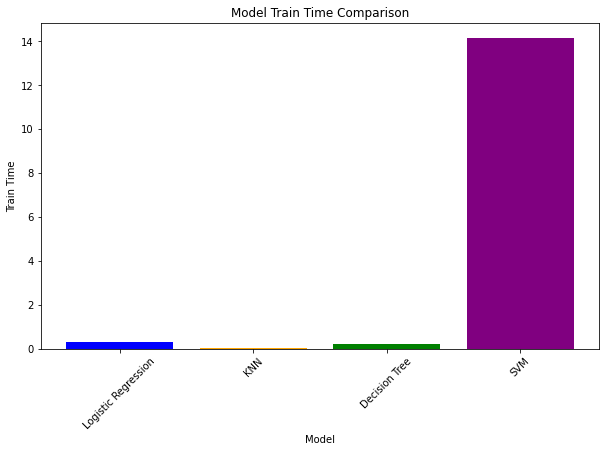

In [22]:
# Plotting the train time
colors = ['blue', 'orange', 'green', 'purple']
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['Train Time'], color=colors)
plt.xlabel('Model')
plt.ylabel('Train Time')
plt.title('Model Train Time Comparison')
plt.xticks(rotation=45)
plt.show()

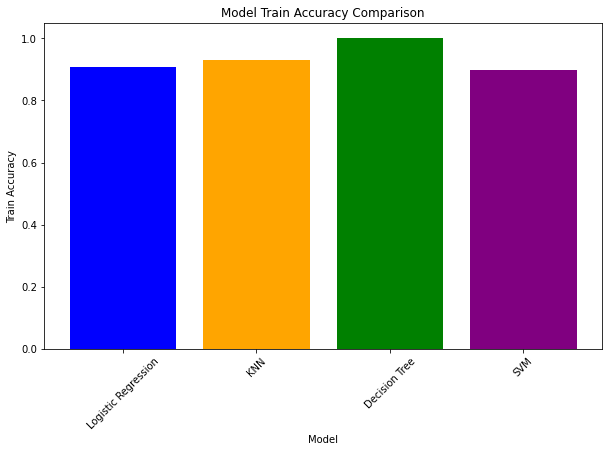

In [23]:
# Plotting the train accuracy
colors = ['blue', 'orange', 'green', 'purple']
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['Train Accuracy'], color=colors)
plt.xlabel('Model')
plt.ylabel('Train Accuracy')
plt.title('Model Train Accuracy Comparison')
plt.xticks(rotation=45)
plt.show()

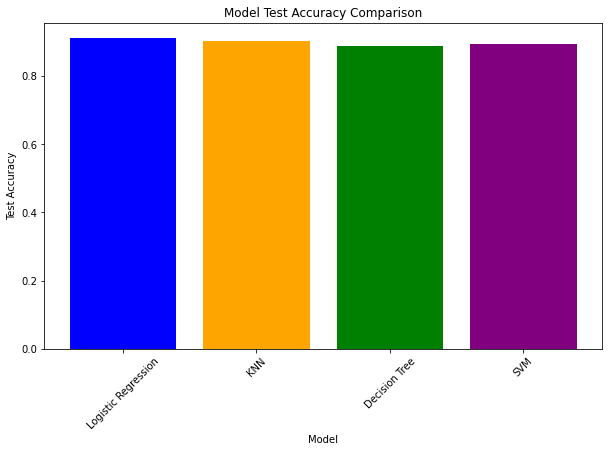

In [24]:
# Plotting the test accuracy
colors = ['blue', 'orange', 'green', 'purple']
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['Test Accuracy'], color=colors)
plt.xlabel('Model')
plt.ylabel('Test Accuracy')
plt.title('Model Test Accuracy Comparison')
plt.xticks(rotation=45)
plt.show()

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

Feature Engineering
- While gender might seem relevant, it's important to consider ethical implications and potential biases. If gender is not directly related to the decision-making process of subscribing to a term deposit, it might be best to exclude it.
- However, if there's a strong belief that gender plays a significant role, it can be included after careful consideration and potential mitigation of biases.
- The current dataset doesn't have gender feature. 
- We can eliminate certain variables which might not be contributing to the result like age

In [25]:
# Define a dictionary of classifiers and their corresponding parameter grids
classifiers = {
    'Logistic Regression': {
        'model': LogisticRegression(),
        'param_grid': {'C': [0.001, 0.01, 0.1, 1, 10],
                       'penalty': ['l1', 'l2']}
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3, 5, 7, 9],
                       'metric': ['euclidean', 'manhattan']}
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [3, 5, 7, None],
                       'min_samples_split': [2, 5, 10],
                       'min_samples_leaf': [1, 2, 4]}
    },
    'SVM': {
        'model': SVC(),
        'param_grid': {'C': [0.1, 1, 10],
                       'kernel': ['linear', 'rbf'],
                       'gamma': [0.1, 1]}
    }
}

# Create a list to store results
results = []

# Perform grid search and store results for each classifier
for name, clf in classifiers.items():
    grid_search = GridSearchCV(clf['model'], clf['param_grid'], cv=5)
    grid_search.fit(X_train, y_train)
    best_score = grid_search.best_score_
    best_params = grid_search.best_params_
    results.append([name, best_score, best_params])

# Create a DataFrame from the results
results_df = pd.DataFrame(results, columns=['Model', 'Best Score', 'Best Parameters'])

# Print the results DataFrame
print(results_df)

                 Model  Best Score  \
0  Logistic Regression    0.907223   
1                  KNN    0.907739   
2        Decision Tree    0.913141   
3                  SVM    0.907253   

                                     Best Parameters  
0                        {'C': 0.1, 'penalty': 'l2'}  
1          {'metric': 'manhattan', 'n_neighbors': 9}  
2  {'max_depth': 7, 'min_samples_leaf': 4, 'min_s...  
3       {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}  


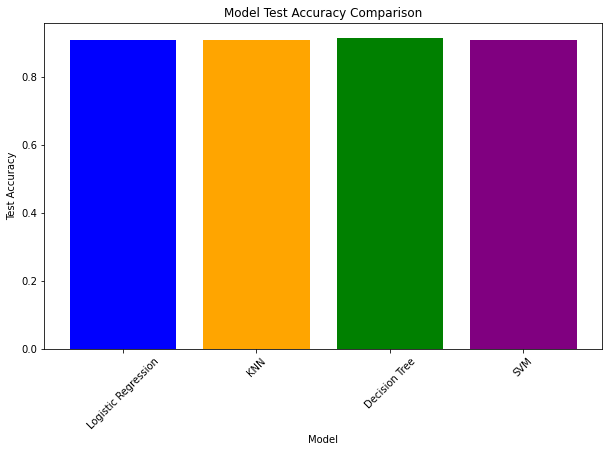

In [26]:
# Plotting the test accuracy
colors = ['blue', 'orange', 'green', 'purple']
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['Best Score'], color=colors)
plt.xlabel('Model')
plt.ylabel('Test Accuracy')
plt.title('Model Test Accuracy Comparison')
plt.xticks(rotation=45)
plt.show()

There has been a slight increase in accuracy scores for KNN, Decisison Tree and SVM after Hyperparameter tuning and Grid Search

Performance Metrics: Since there is a significant imbalance in classes (more 'no' than 'yes' responses), we should consider using metrics like F1-score, precision, and recall, which are more balanced than accuracy.

In [30]:
# As y_train is longer
if len(y_train) > len(y_test):
    y_train = y_train[:len(y_test)]
elif len(y_test) > len(y_train):
    y_test = y_test[:len(y_train)]

# Now, y_train and y_test have the same length
report = classification_report(y_train, y_test)
print(report)

              precision    recall  f1-score   support

          no       0.89      0.89      0.89      7320
         yes       0.12      0.12      0.12       918

    accuracy                           0.80      8238
   macro avg       0.50      0.50      0.50      8238
weighted avg       0.80      0.80      0.80      8238



##### Questions